In [159]:
import week1
import week3
import numpy as np
import matplotlib.pyplot as plt


In [160]:
def action_to_name(a):
    if a == 0:
        return "rock"
    if a == 1:
        return "paper"
    return "scissors"

In [161]:
def strat_into_row_strat(strat: np.array):
    # print(f"into row, shape {strat.shape}")
    if strat.shape == (1, max(strat.shape)):
        return strat  # Already in the desired shape
    else:
        return strat.reshape((1, max(strat.shape)))
    
def strat_into_col_strat(strat: np.array):
    # print(f"into col, shape {strat.shape}")
    if strat.shape == (max(strat.shape), 1):
        return strat
    else:
        return strat.reshape((max(strat.shape), 1))

# row_strategy = np.array([[0.1, 0.2, 0.7]])
# print(f"actual row {row_strategy}, shpae {row_strategy.shape}")
# strat = np.array([1, 0, 0])
# into_row = strat_into_row_strat(strat)
# into_col = strat_into_col_strat(strat)
# print(f"strat {strat} -> row {into_row}, col {into_col}")
# strat = np.array([[1, 0, 0]])
# into_row = strat_into_row_strat(strat)
# into_col = strat_into_col_strat(strat)
# print(f"strat {strat} -> row {into_row}, col {into_col}")
# strat = np.array([[1, 0, 0]]).T
# into_row = strat_into_row_strat(strat)
# into_col = strat_into_col_strat(strat)
# print(f"strat {strat} -> row {into_row}, col {into_col}")

In [162]:
def average_strat(strat, n):
    counts = np.zeros(n)
    for i in range(n):
        counts[i] = strat.count(i)
    avg_strat = counts / sum(counts)
    return avg_strat

def best_response_from_avg(matrix, actions, n):#counts, n):
    # 2 1 1 0
    # a = actions[-1]
    # counts[a] += 1
    # strat = counts / sum(counts)
    if len(actions) == 0:
        a = np.random.randint(0,n)
        strat = np.zeros(n)
        strat[a] = 1
        return np.array([strat])
    
    strat = average_strat(actions, n)
    strat = np.array([strat])
    br = week1.best_response_to_row_player(matrix, strat)
    # print(f"{actions} -> {strat} -> {br}")
    return br.reshape((1, -1))


def best_response_last(matrix, actions, n):
    a = actions[-1] if len(actions) > 0 else np.random.randint(0,n)
    strat = np.zeros(n)
    strat[a] = 1.0
    
    strat = np.array([strat])
    # print(strat)
    br = week1.best_response_to_row_player(matrix, strat)
    # print(f"strat {strat} -> br {br}")
    return br.reshape((1, -1))

In [163]:

def game(matrix1, matrix2, turns, function_row, function_column):
    n, m = matrix1.shape

    actions1 = []
    actions2 = []

    utility1 = []
    utility2 = []

    expl = []
    for i in range(turns):
        # print(f"turn {i+1}/{turns}")
        # strat1 = strat_into_row_strat(function_row(matrix1, actions2, m))
        strat1 = function_row(matrix1, actions2, m)
        # strat2 = strat_into_col_strat(function_column(matrix2.T, actions1, n))
        strat2 = function_column(matrix2, actions1, n)
        # print(strat1)
        # print(strat2)
        # response1 = np.choices(strat1)
        # response2 = np.argmax(strat2)
        
        # print(f"strat1 {strat1}, shape {strat1.shape}, argmax {np.argmax(strat1.shape)}")
        # print(f"strat2 {strat2}, shape {strat2.shape}, argmax {np.argmax(strat2.shape)}")
        response1 = np.random.choice(n, p=strat1[0])
        response2 = np.random.choice(m, p=strat2[0])
        
        actions1.append(response1)
        actions2.append(response2)

        u1 = matrix1[response1, response2]
        u2 = matrix2[response2, response1]

        utility1.append(u1)
        # print(action_to_name(response1), " vs ", action_to_name(response2))
        # print(f"a1 {response1} with u {u1}, a2 {response2} with u {u2}")
        utility2.append(u2)
        # print(u1, u2)

        # print(average_strat(actions1, n).T.shape, average_strat(actions2, m).shape)
        # print(strat1.shape, strat2.T.shape)
        
        exploitation = week3.compute_exploitability_zero_sum(matrix1,
                                                             row_strategy=strat1,
                                                             column_strategy=strat2
                                                            #  row_strategy=strat_into_row_strat(average_strat(actions1, n)),
                                                            #  column_strategy=strat_into_col_strat(average_strat(actions2, m)))
        # print(f"avg strat1 {average_strat(actions1, n)}, avg strat2 {average_strat(actions2, m)}")
        
        expl.append(exploitation)

    # print(f"u1: {utility1}",f"sum {sum(utility1)}",sep='\n')
    # print(f"u2: {utility2}", f"sum {sum(utility2)}", sep='\n')
    # print(expl)
    # plt.plot(expl)
    # plt.show()
    return utility1, utility2, expl






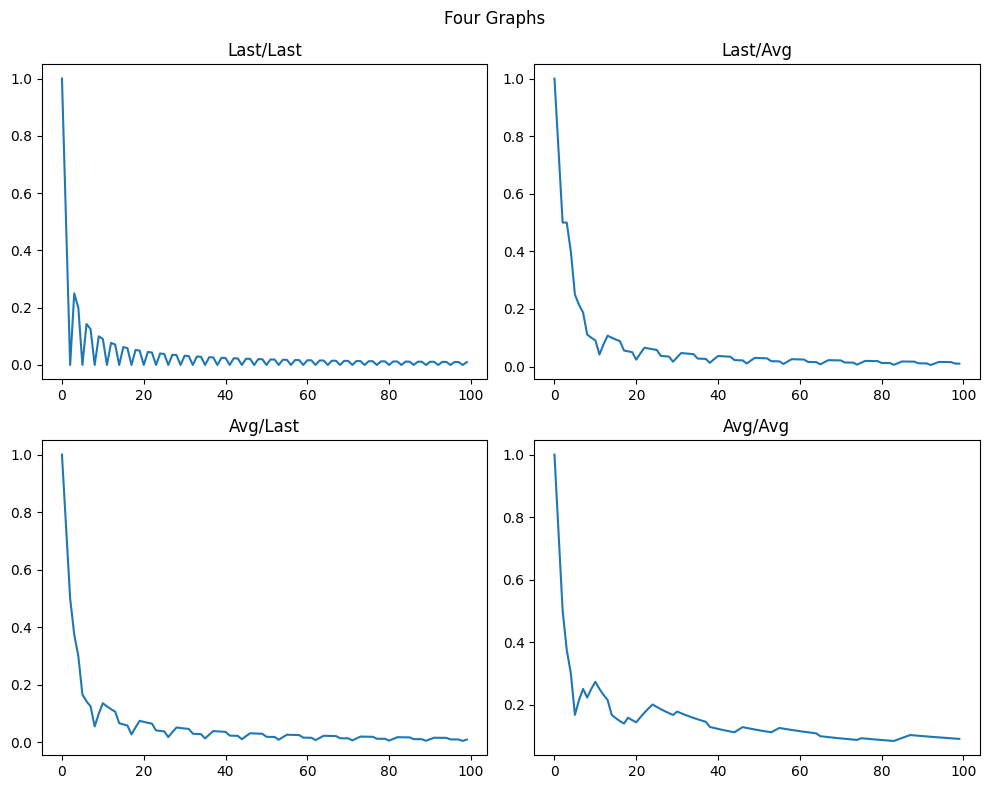

In [164]:
# rock-paper-scissors
matrix1 = np.array([[0, 1, -1],
                    [-1, 0, 1],
                    [1, -1, 0]])
matrix2 = -matrix1.T

# matching pennies
# matrix1 = np.array([[1, -1],
#                     [-1, 1]])
# matrix2 = -matrix1.T

turns = 100
_,_, exlp_ll = game(matrix1, matrix2, turns, best_response_last, best_response_last)
_,_, exlp_la = game(matrix1, matrix2, turns, best_response_last, best_response_from_avg)
_,_, exlp_al = game(matrix1, matrix2, turns, best_response_from_avg, best_response_last)
_,_, exlp_aa = game(matrix1, matrix2, turns, best_response_from_avg, best_response_from_avg)


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot on each subplot
axes[0, 0].plot(exlp_ll)
axes[0, 0].set_title('Last/Last')

axes[0, 1].plot(exlp_la)
axes[0, 1].set_title('Last/Avg')

axes[1, 0].plot(exlp_al)
axes[1, 0].set_title('Avg/Last')

axes[1, 1].plot(exlp_aa)
axes[1, 1].set_title('Avg/Avg')

# Add a title for the entire figure
fig.suptitle('Four Graphs')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()